In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하기 편함
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno # null 값 표현

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

C:\Users\daum0\AppData\Local\Temp\ipykernel_4156\3928859306.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 01. 데이터 확인

In [2]:
df_train = pd.read_csv("C:/Users/daum0/Downloads/카카오톡 받은 파일/DataFiery/train_titanic.csv")
df_test = pd.read_csv("C:/Users/daum0/Downloads/카카오톡 받은 파일/DataFiery/test_titanic.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 02. Null data check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t percent of nan value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of nan value: 0.00%
column:   Survived	 percent of nan value: 0.00%
column:     Pclass	 percent of nan value: 0.00%
column:       Name	 percent of nan value: 0.00%
column:        Sex	 percent of nan value: 0.00%
column:        Age	 percent of nan value: 19.87%
column:      SibSp	 percent of nan value: 0.00%
column:      Parch	 percent of nan value: 0.00%
column:     Ticket	 percent of nan value: 0.00%
column:       Fare	 percent of nan value: 0.00%
column:      Cabin	 percent of nan value: 77.10%
column:   Embarked	 percent of nan value: 0.22%


In [7]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t percent of nan value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 percent of nan value: 0.00%
column:     Pclass	 percent of nan value: 0.00%
column:       Name	 percent of nan value: 0.00%
column:        Sex	 percent of nan value: 0.00%
column:        Age	 percent of nan value: 20.57%
column:      SibSp	 percent of nan value: 0.00%
column:      Parch	 percent of nan value: 0.00%
column:     Ticket	 percent of nan value: 0.00%
column:       Fare	 percent of nan value: 0.24%
column:      Cabin	 percent of nan value: 78.23%
column:   Embarked	 percent of nan value: 0.00%


<Axes: >

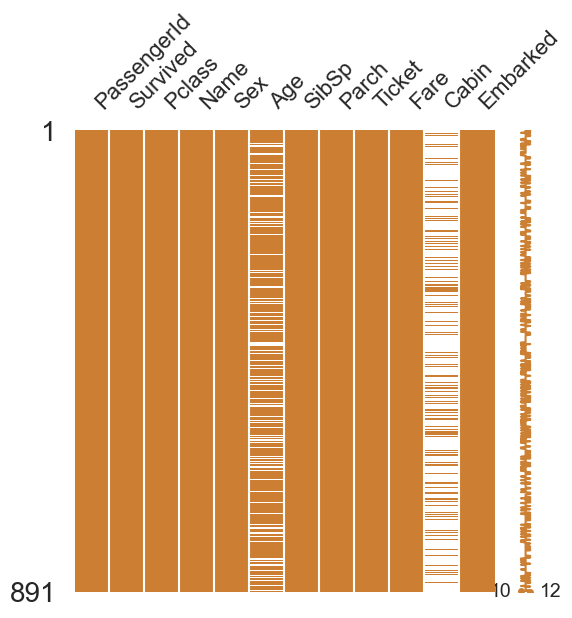

In [9]:
msno.matrix(df=df_train.iloc[:,:], figsize=(6,6), color=(0.8, 0.5, 0.2))

<Axes: >

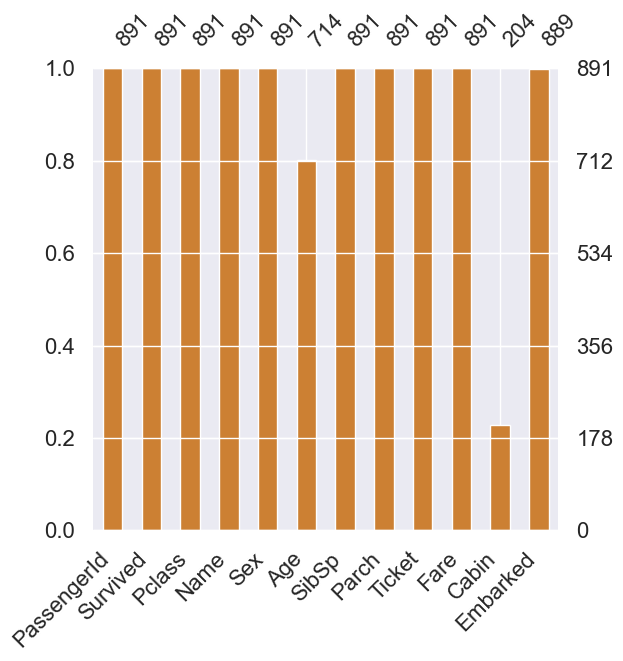

In [10]:
msno.bar(df=df_train.iloc[:,:], figsize=(6,6), color=(0.8, 0.5, 0.2))

# 03. Target label 확인

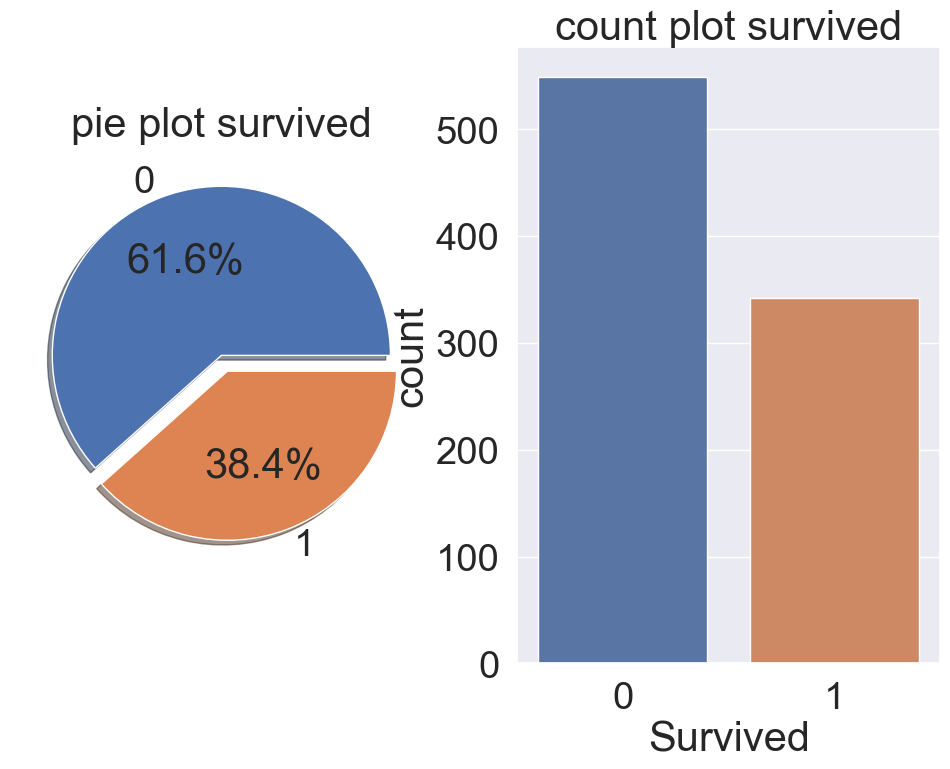

In [12]:
f, ax = plt.subplots(1,2, figsize=(12, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('pie plot survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('count plot survived')
plt.show()


# 04. Exploratory data analysis

## 4-1. Pclass

In [18]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

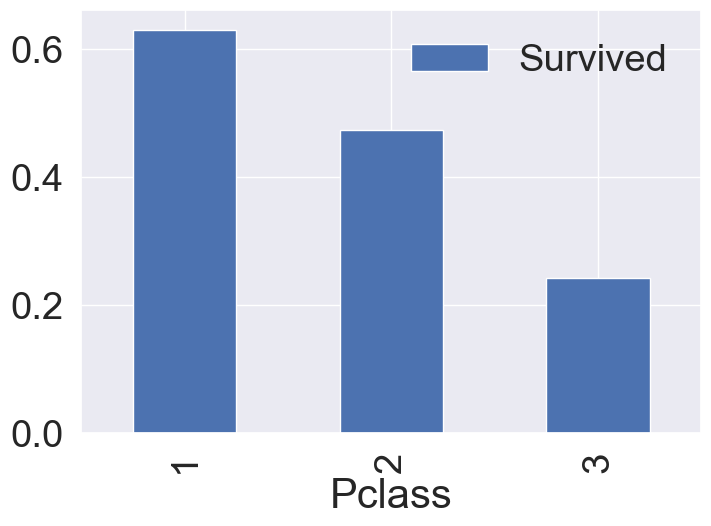

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

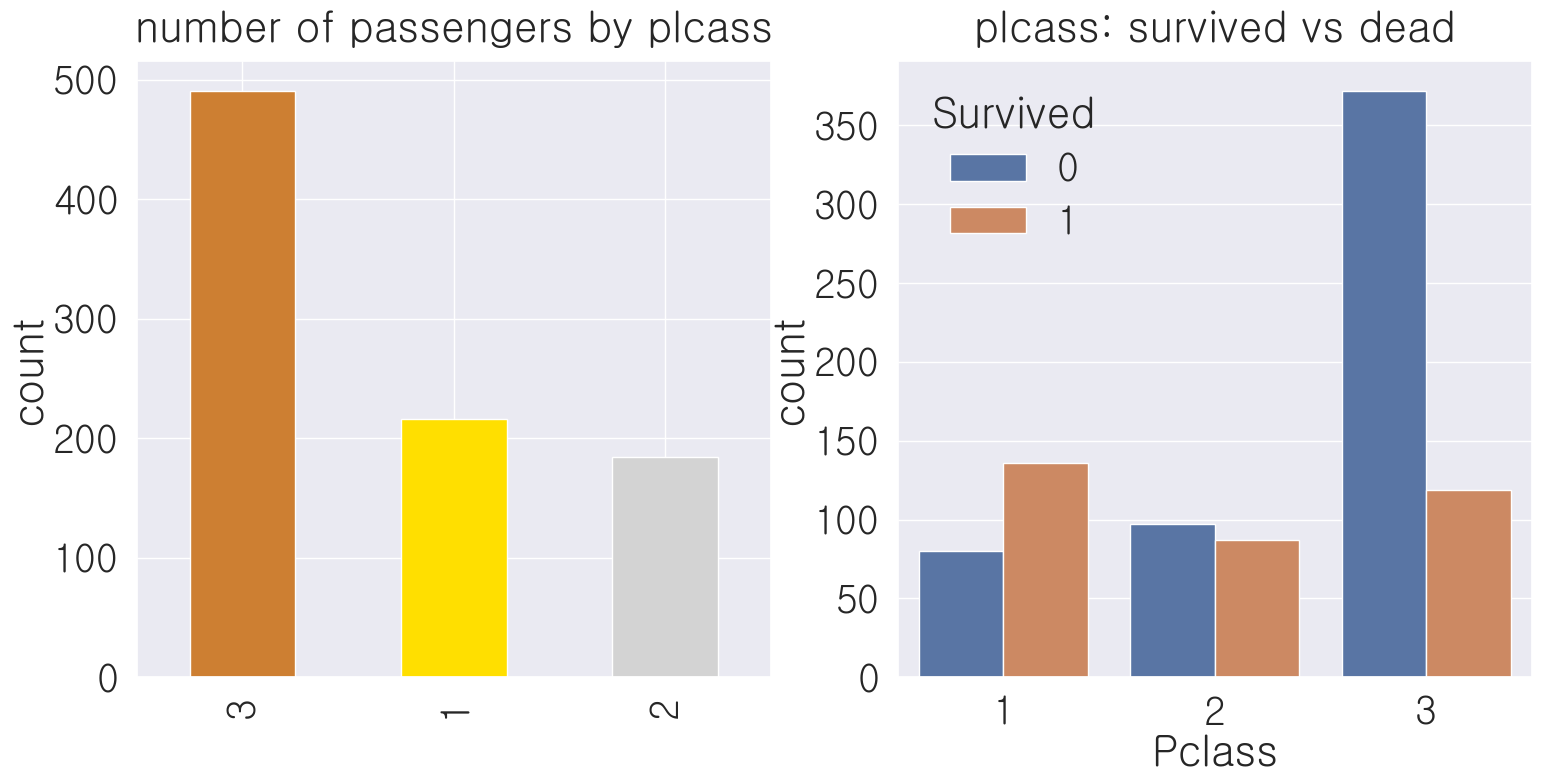

In [38]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('number of passengers by plcass', y=y_position)
ax[0].set_ylabel('count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])

ax[1].set_title('plcass: survived vs dead', y=y_position)
plt.show()


## 4-2. Sex

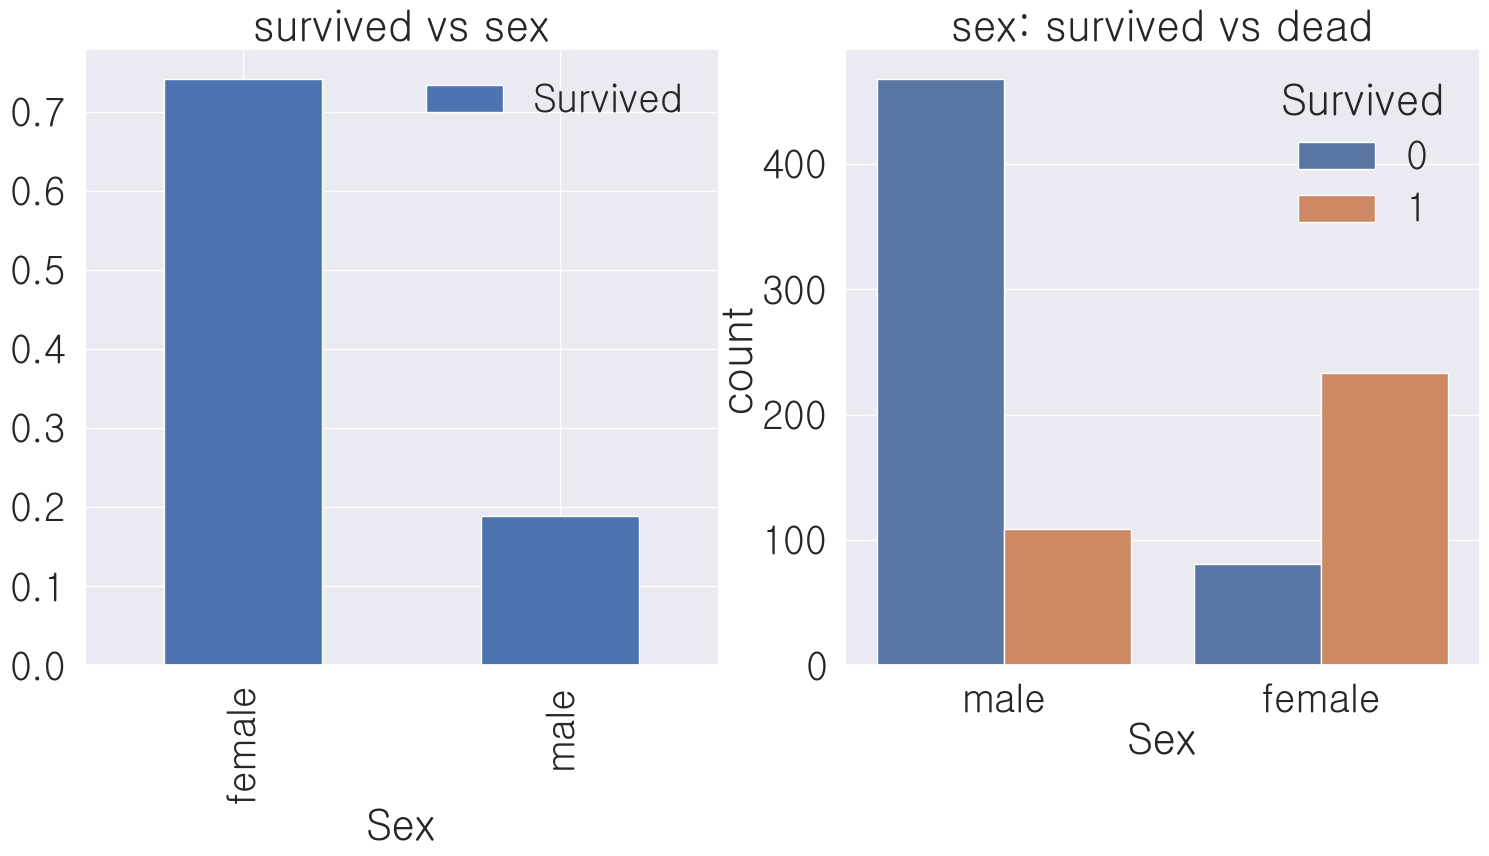

In [56]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('survived vs sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('sex: survived vs dead' )
plt.show()


In [62]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


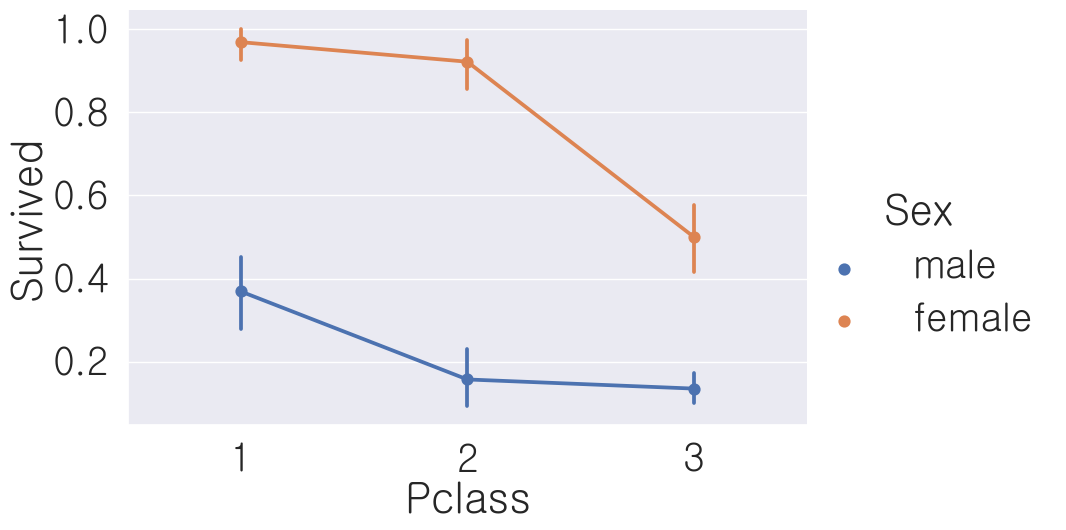

In [75]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=df_train, height=6, aspect=1.5)

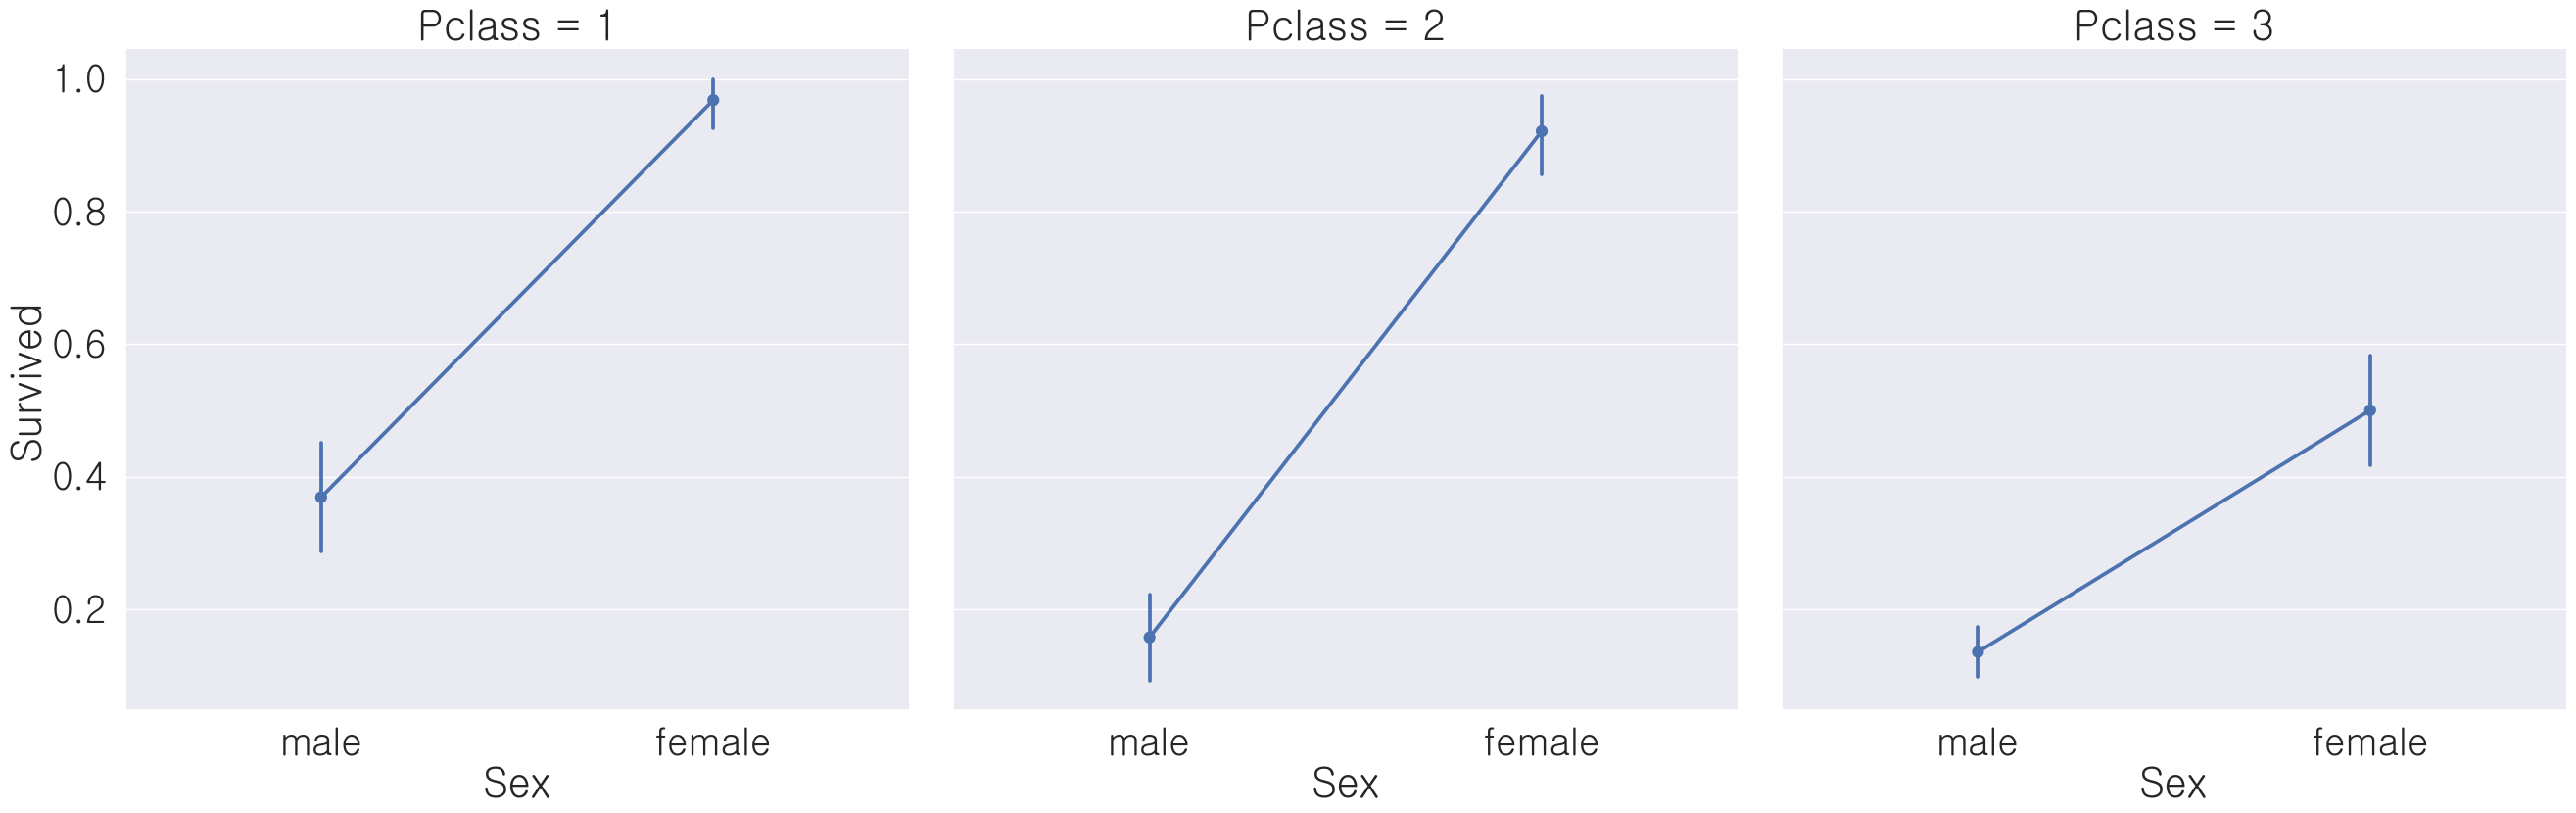

In [82]:
sns.catplot(x='Sex', y='Survived', col='Pclass', kind='point', data=df_train, height=9, aspect=1) # hue or col 

## 4-3 Age

In [86]:
print('제일 나이 많은 탑승객: {:.1f} age'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객: {:.1f} age'.format(df_train['Age'].min()))
print('평균 나이 탑승객: {:.1f}age'. format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 age
제일 나이 적은 탑승객: 0.4 age
평균 나이 탑승객: 29.7age


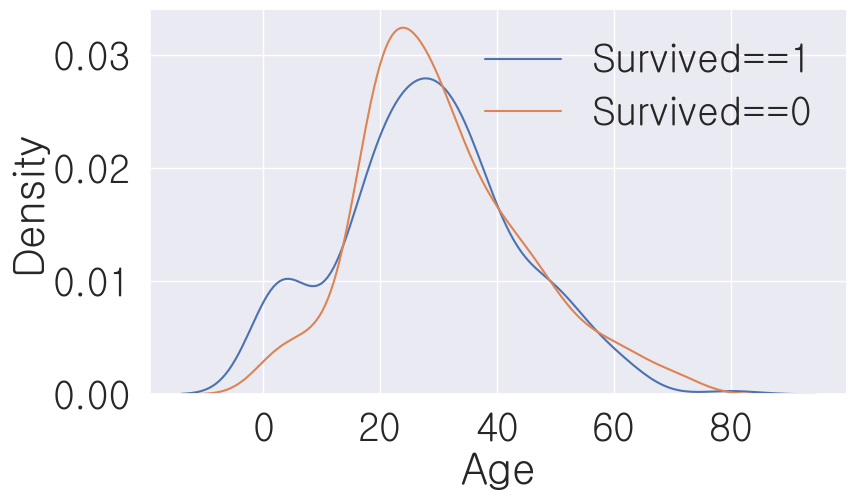

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)

plt.legend(['Survived==1', 'Survived==0'])
plt.show()

> - 보시다시피, 생존자 중 나이가 어린 경우가 많음을 볼 수 있음

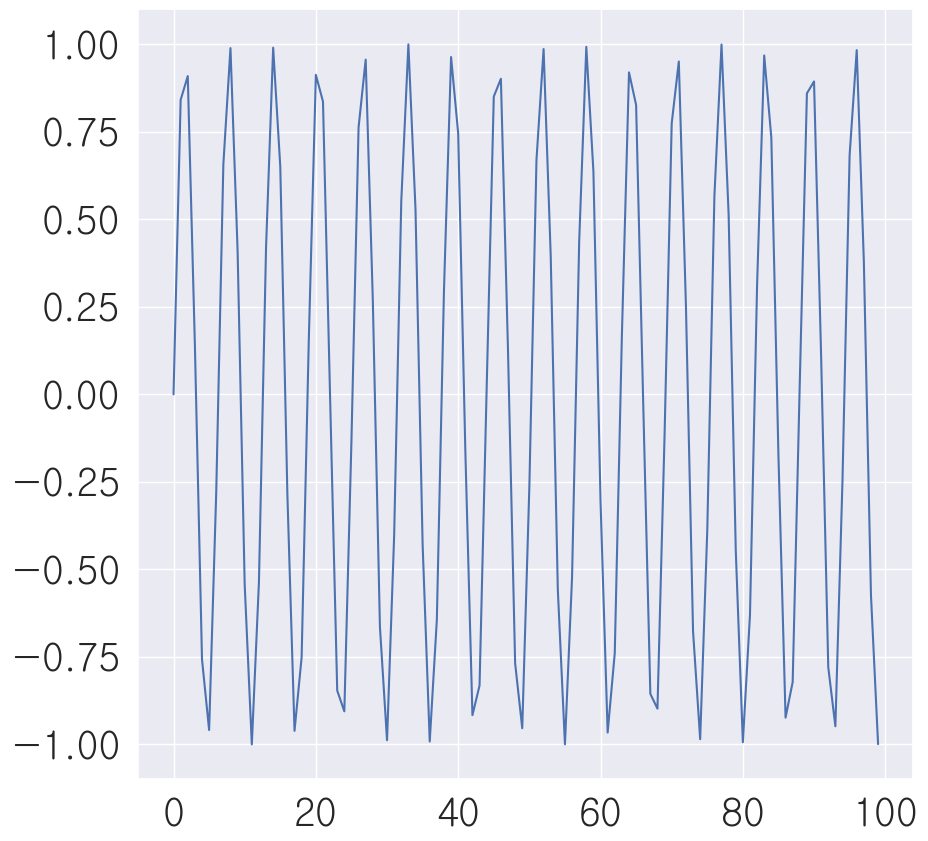

In [97]:
# f = plt.figure(figsize=(5, 5))

f, ax = plt.subplots(1,1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)


plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

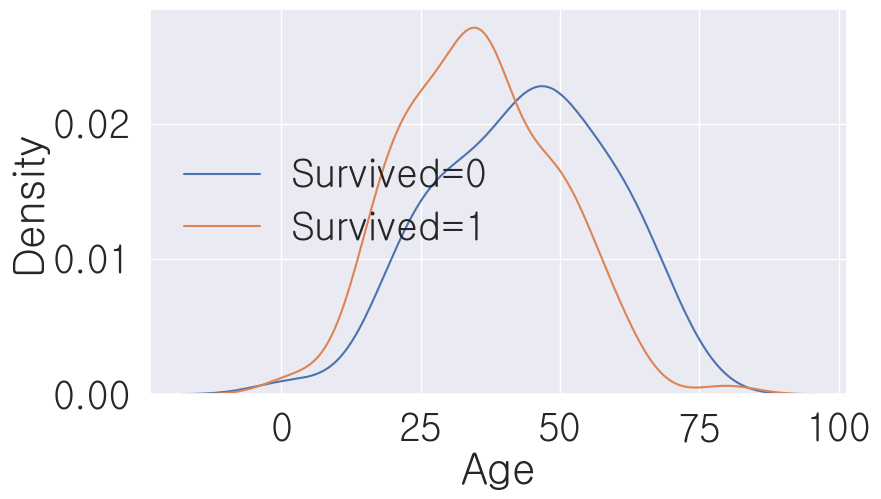

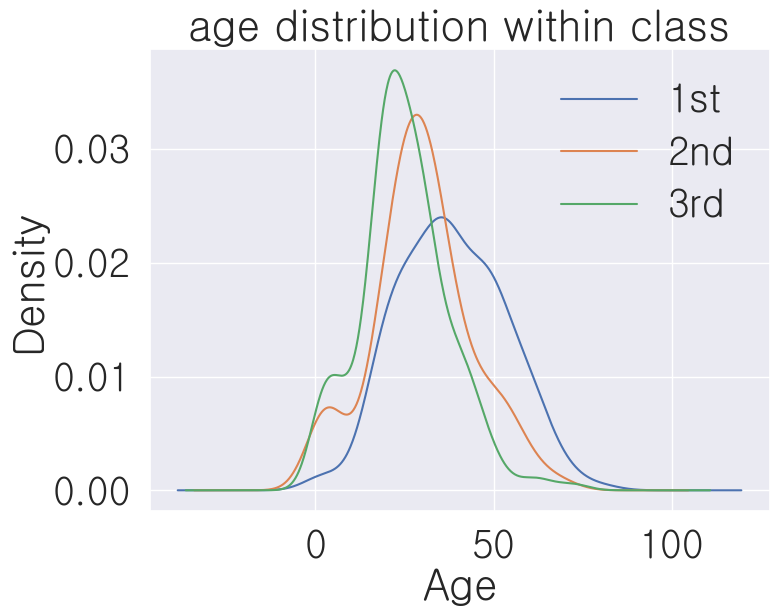

In [103]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')


plt.xlabel('Age')
plt.title('age distribution within class')
plt.legend(['1st', '2nd', '3rd'])

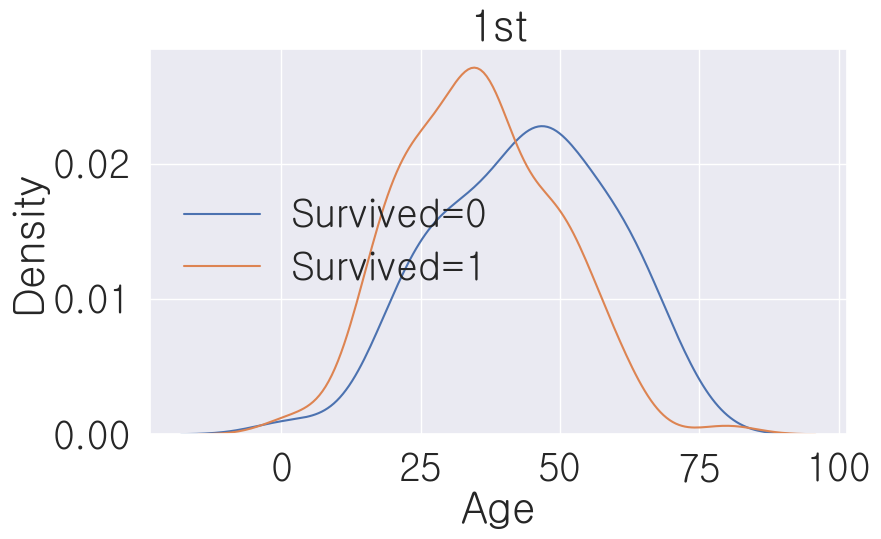

In [115]:
# Create figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# Plot KDE plot for 'Survived=0'
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'], ax=ax, label='Survived=0')

# Plot KDE plot for 'Survived=1' on a new axis
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'], ax=ax, label='Survived=1')

# Set legend
ax.legend()

plt.title('1st')
# Show plot
plt.show()

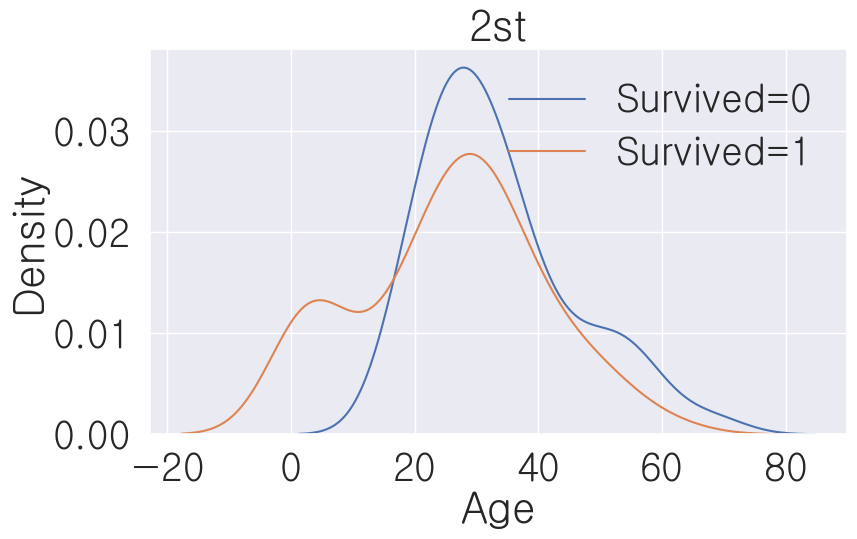

In [116]:
# Create figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# Plot KDE plot for 'Survived=0'
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'], ax=ax, label='Survived=0')

# Plot KDE plot for 'Survived=1' on a new axis
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], ax=ax, label='Survived=1')

# Set legend
ax.legend()

plt.title('2st')
plt.show()

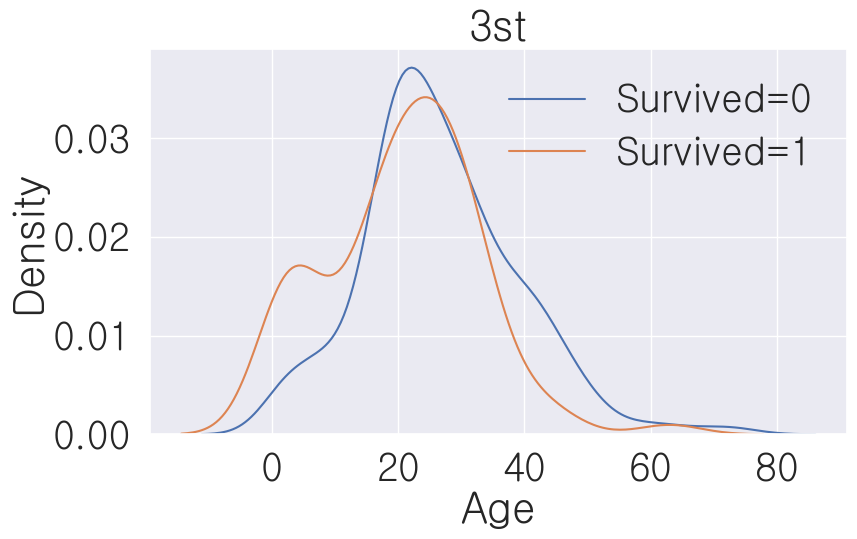

In [117]:
# Create figure and axis object
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# Plot KDE plot for 'Survived=0'
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'], ax=ax, label='Survived=0')

# Plot KDE plot for 'Survived=1' on a new axis
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'], ax=ax, label='Survived=1')

# Set legend
ax.legend()

plt.title('3st')
plt.show()

> - Class 가 높을 수록 나이 많은 사람의 비중이 커짐
> - 나이대가 변하면서 생존률이 어떻게 되는 지 확인
> - 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 확인

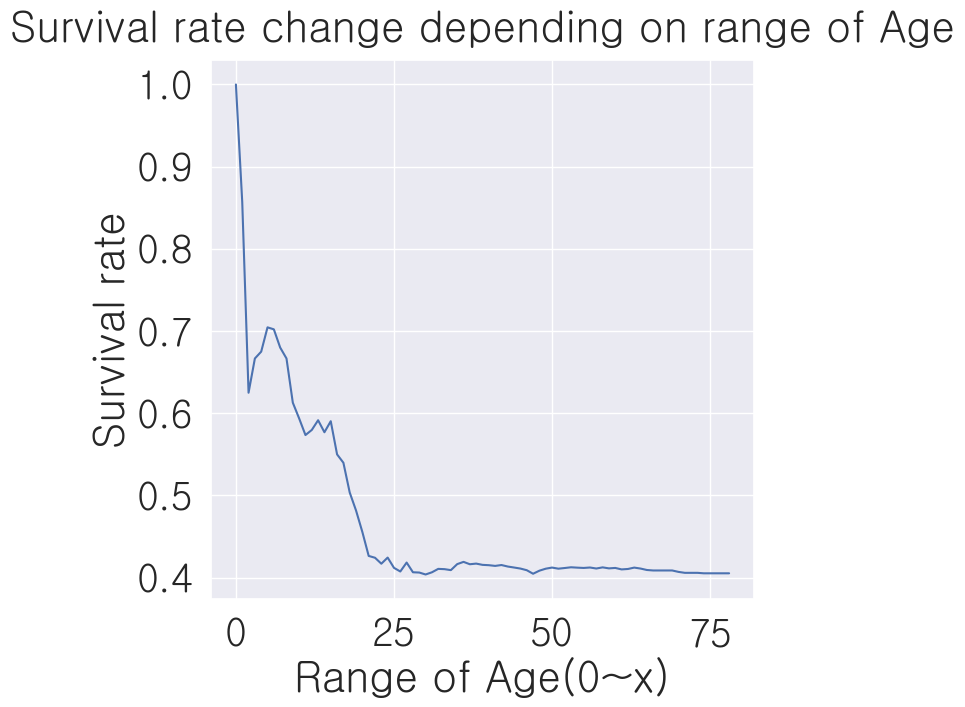

In [118]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()  

> - 보시다시피, 나이가 어릴 수록 생존률이 확실히 높은것을 확인
> - 우리는 이 나이가 중요한 feature 로 쓰일 수 있음을 확인

## 4-4 Pclass, Sex, Age

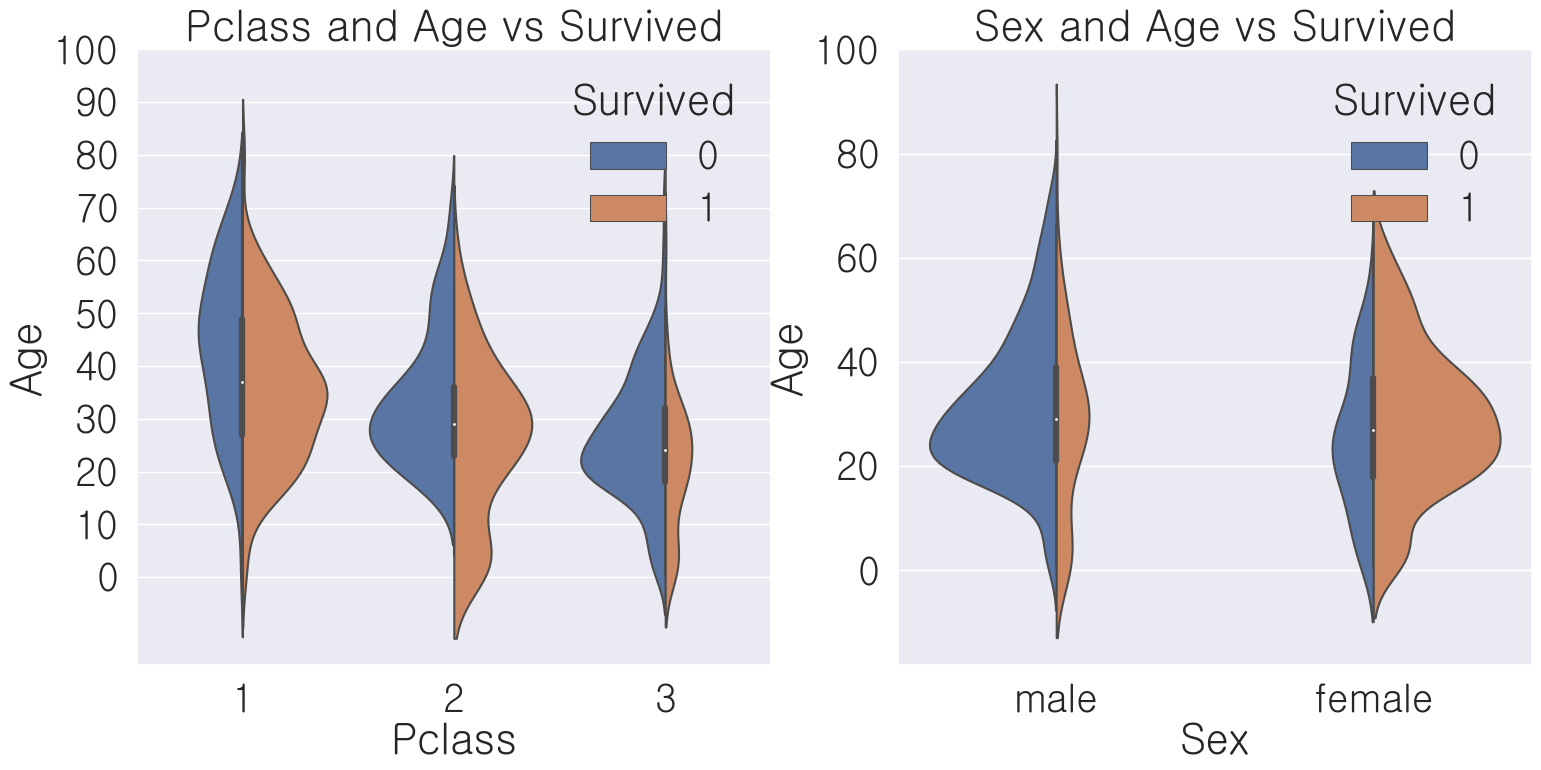

In [122]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,20))

plt.show()

> - 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
> - 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
> - 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
> - 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
> - 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다

## 4-5 embarked

<Axes: xlabel='Embarked'>

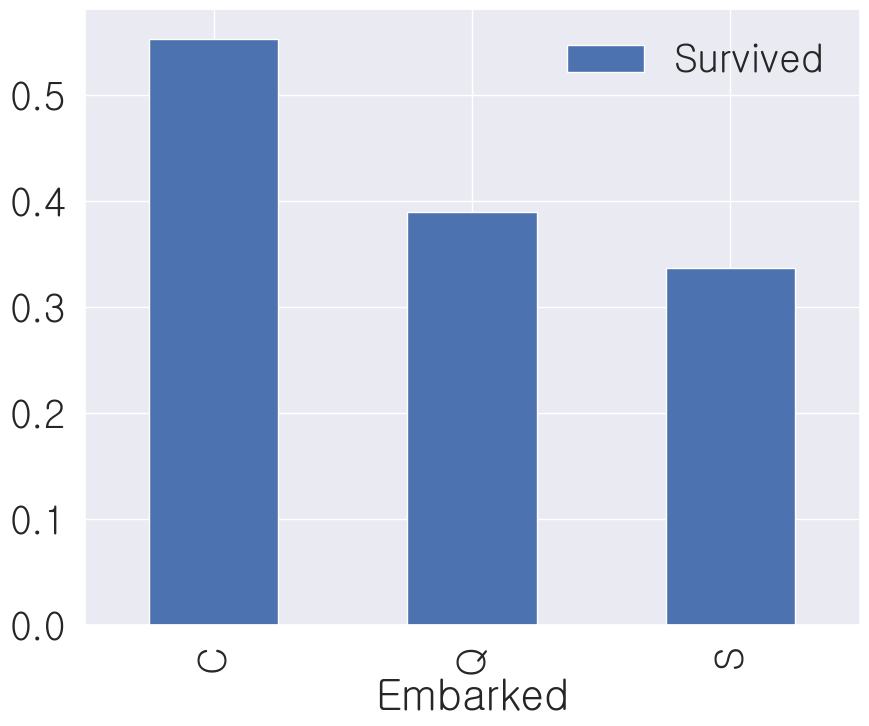

In [129]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

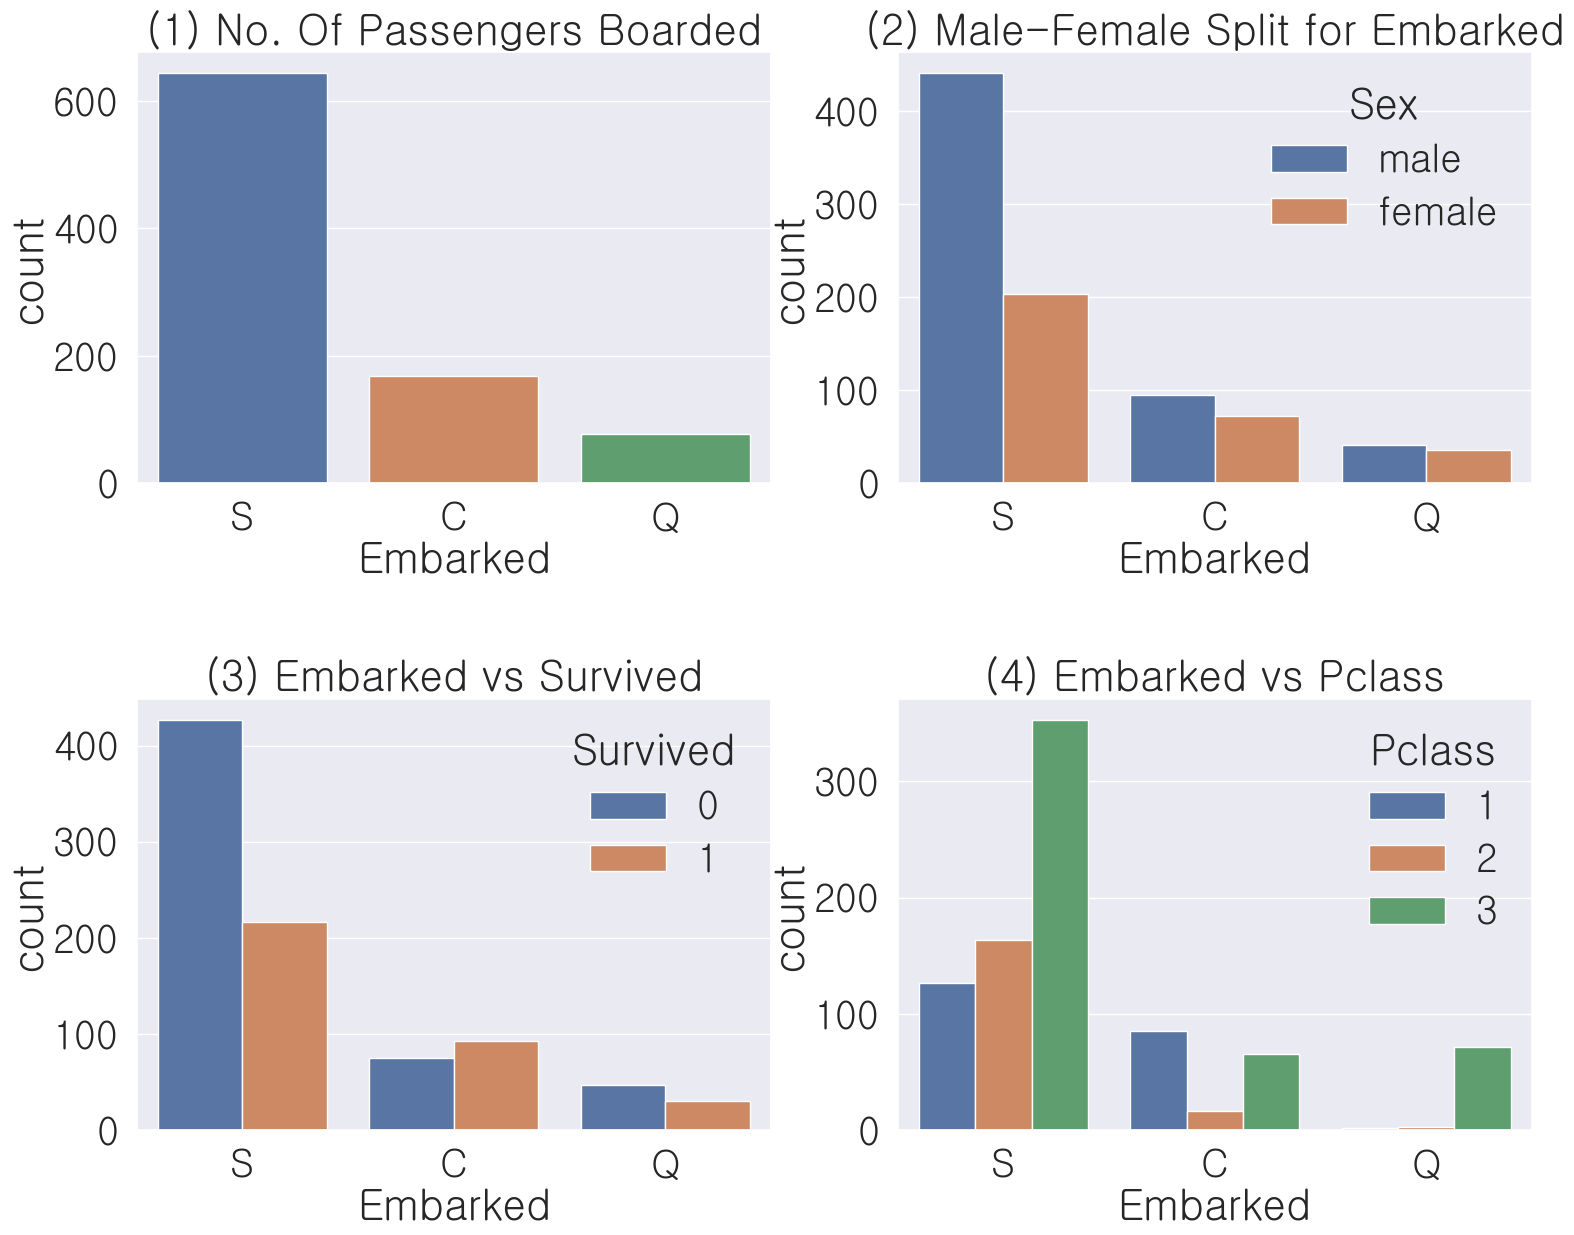

In [132]:
f, ax = plt.subplots(2,2, figsize=(18, 14))

sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> - Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승
> - Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많음
> - Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있음 (이전 그래프에서 확인)
> - Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 탐. S는 3rd class 가 많아서 > > - 생존확률이 낮음

## 4-6.  Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [133]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


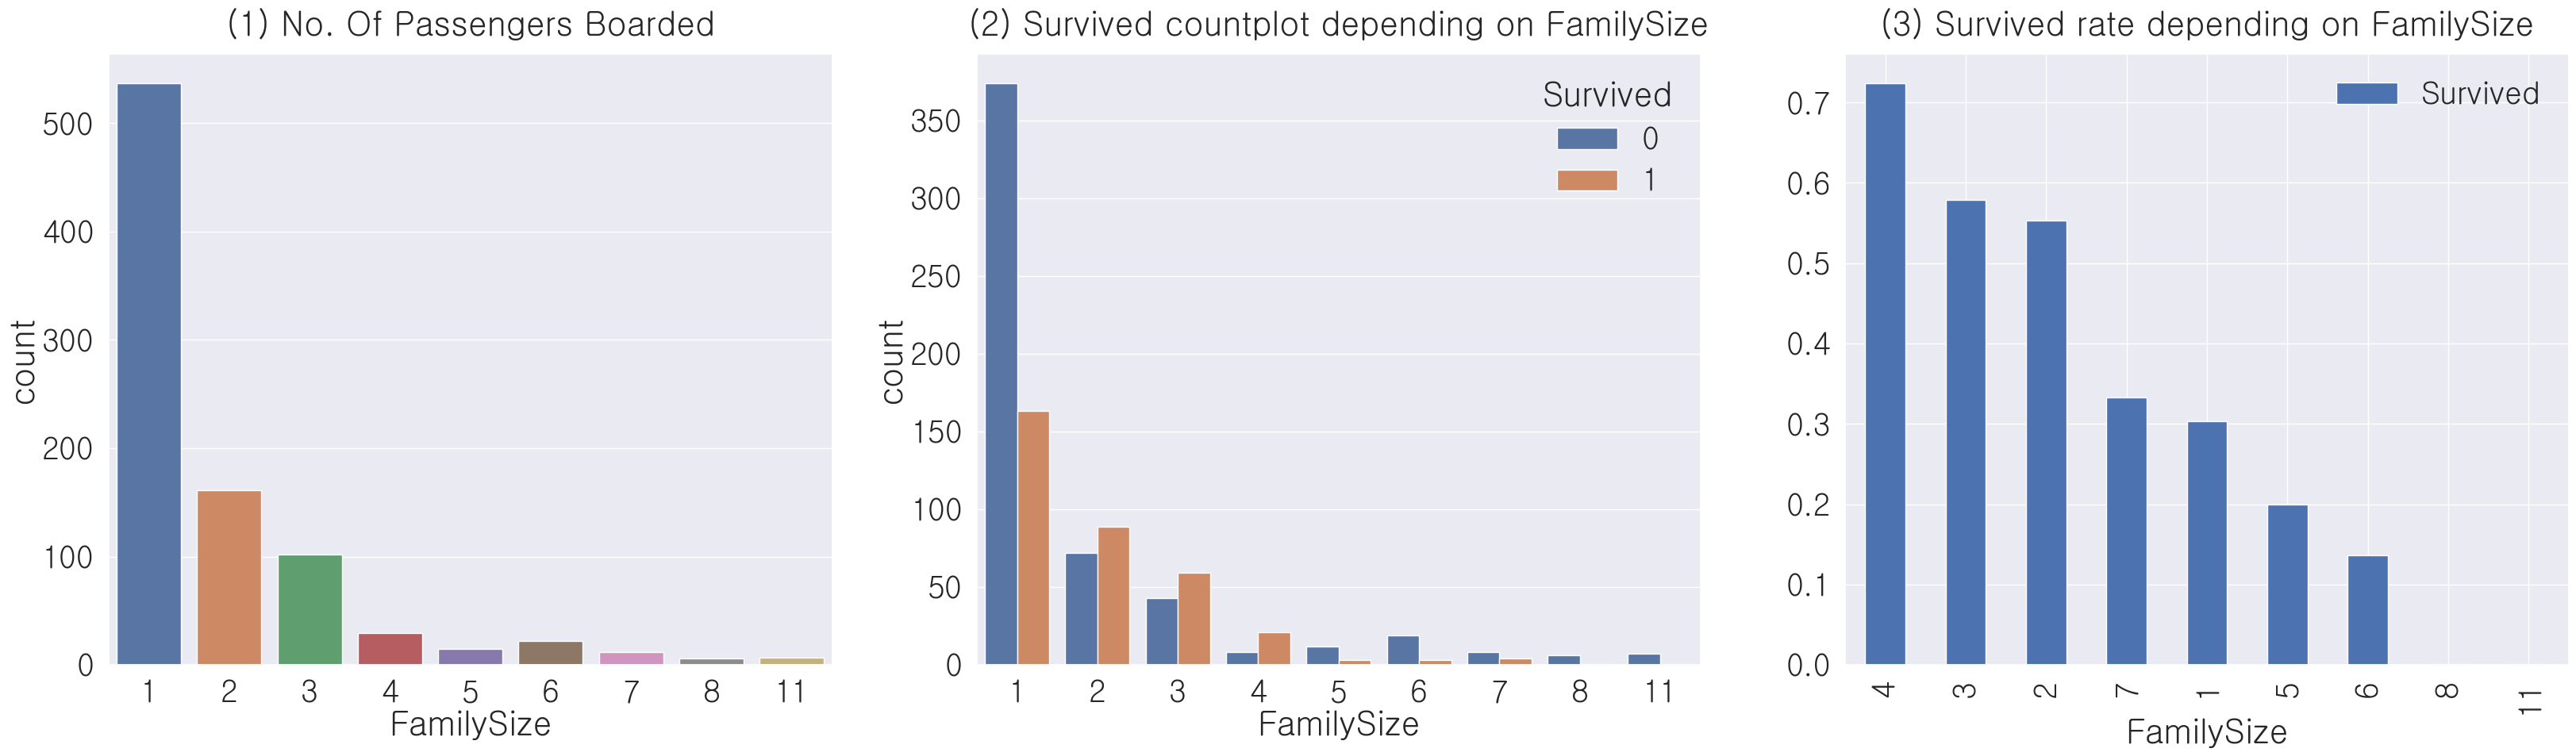

In [136]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> - Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
> - Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다

## 4-7.  Fare

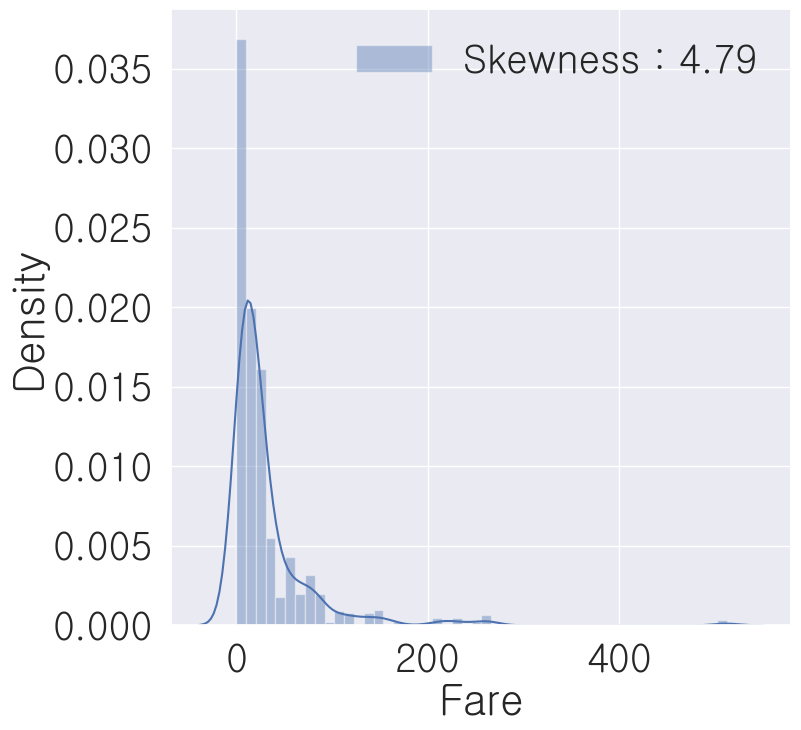

In [138]:
# 왜도 

fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [139]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

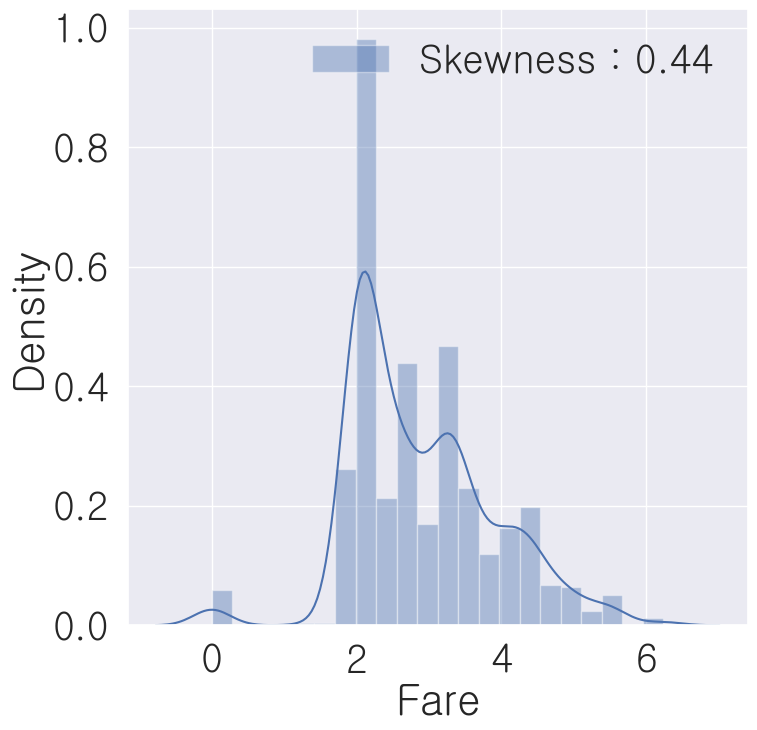

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

> - log 를 취하니, 이제 비대칭성이 많이 사라진 것을 확인
> - 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있음
> - feature engineering 작업

## 4-8.  Cabin
> - 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않기에 모델에 포함시키지 않도록 함

## 4-9. Ticket
> - 너무 다양해서 아이디어가 필요적, 우선 모델에 제외

In [141]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64